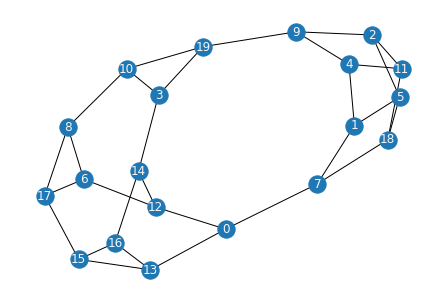

In [1]:
from maxcut_instance_generator import regular_graph

model = regular_graph(num_nodes=20, degree=3, draw=True)

In [2]:
from encoding import RandomAccessEncoder

# Quantum Random Access Encoders
qrac_1_1 = RandomAccessEncoder(1, 1)
qrac_2_1 = RandomAccessEncoder(2, 1)
qrac_3_1 = RandomAccessEncoder(3, 1)

# Hamiltonians
H_1_1 = qrac_1_1.generate_hamiltonian(model)
H_2_1 = qrac_2_1.generate_hamiltonian(model)
H_3_1 = qrac_3_1.generate_hamiltonian(model)

# Print Hamiltonians
# print(qrac_1_1.print_hamiltonian(H_1_1))
# print(qrac_2_1.print_hamiltonian(H_2_1))
print(qrac_3_1.print_hamiltonian(H_3_1))

(0.75+0j)ZIIYIIIII
(0.75+0j)ZIIIXIIII
(0.75+0j)ZIIIYIIII
(0.75+0j)XIIZIIIII
(0.75+0j)XIIXIIIII
(0.75+0j)XIIYIIIII
(0.75+0j)YIIXIIIII
(0.75+0j)YIIIIIZII
(0.75+0j)YIIIIIYII
(0.75+0j)IZIIIIXII
(0.75+0j)IZIIIIIZI
(0.75+0j)IZIIIZIII
(0.75+0j)IIIZIIZII
(0.75+0j)IIIZIIYII
(0.75+0j)IIZXIIIII
(0.75+0j)IXIIZIIII
(0.75+0j)IXIIXIIII
(0.75+0j)IXIIIIIXI
(0.75+0j)IIZYIIIII
(0.75+0j)IIIIZIXII
(0.75+0j)IIIIZIIXI
(0.75+0j)IIIIIZZII
(0.75+0j)IIIIIZXII
(0.75+0j)IIZIIIYII
(0.75+0j)IIIIXIIZI
(0.75+0j)IYIIYIIII
(0.75+0j)IIIIYIIIZ
(0.75+0j)IIIIIIIZZ
(0.75+0j)IYIIIIIIZ
(0.75+0j)IYIIIIIXI
(-15+0j)IIIIIIIII
None


In [6]:
import numpy as np
from vqe import VQEForQRAO

from scipy.optimize import minimize

# Example of Level = 1
cost_history_1_1 = []
cost_history_2_1 = []
cost_history_3_1 = []
init_theta_list_1_1 = np.random.random(len(qrac_1_1.qubit_to_vertex_map) * 2) * 1e-1
init_theta_list_2_1 = np.random.random(len(qrac_2_1.qubit_to_vertex_map) * 2) * 1e-1
init_theta_list_3_1 = np.random.random(len(qrac_3_1.qubit_to_vertex_map) * 2) * 1e-1

vqe_1_1 = VQEForQRAO(
    hamiltonian=H_1_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_1_1.calculate_edge_among_qubits(model),
)
vqe_2_1 = VQEForQRAO(
    hamiltonian=H_2_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_2_1.calculate_edge_among_qubits(model),
)
vqe_3_1 = VQEForQRAO(
    hamiltonian=H_3_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_3_1.calculate_edge_among_qubits(model),
)

cost_history_1_1.append(vqe_1_1._cost_function(init_theta_list_1_1))
cost_history_2_1.append(vqe_2_1._cost_function(init_theta_list_2_1))
cost_history_3_1.append(vqe_3_1._cost_function(init_theta_list_3_1))

method = "BFGS"
options = {"disp": True, "maxiter": 50, "gtol": 1e-6}

num_iter_1_1 = 1
num_iter_2_1 = 1
num_iter_3_1 = 1

def callback_1_1(x):
    global num_iter_1_1
    cost_val_1_1 = vqe_1_1._cost_function(x) 
    cost_history_1_1.append(cost_val_1_1)
    print(f'{num_iter_1_1}/{options["maxiter"]}\t{cost_val_1_1}')
    num_iter_1_1 += 1

def callback_2_1(x):
    global num_iter_2_1
    cost_val_2_1 = vqe_2_1._cost_function(x) 
    cost_history_2_1.append(cost_val_2_1)
    print(f'{num_iter_2_1}/{options["maxiter"]}\t{cost_val_2_1}')
    num_iter_2_1 += 1

def callback_3_1(x):
    global num_iter_3_1
    cost_val_3_1 = vqe_3_1._cost_function(x) 
    cost_history_3_1.append(cost_val_3_1)
    print(f'{num_iter_3_1}/{options["maxiter"]}\t{cost_val_3_1}')
    num_iter_3_1 += 1

print("Iter\tcost")
opt_1_1 = minimize(
    vqe_1_1._cost_function,
    init_theta_list_1_1,
    method=method,
    options=options,
    callback=callback_1_1,
)

print("Iter\tcost")
opt_2_1 = minimize(
    vqe_2_1._cost_function,
    init_theta_list_2_1,
    method=method,
    options=options,
    callback=callback_2_1,
)

print("Iter\tcost")
opt_3_1 = minimize(
    vqe_3_1._cost_function,
    init_theta_list_3_1,
    method=method,
    options=options,
    callback=callback_3_1,
)

AttributeError: 'NoneType' object has no attribute 'update_quantum_state'

In [5]:
len(init_theta_list_1_1)
len(qrac_1_1.vertex_to_op_map)

20

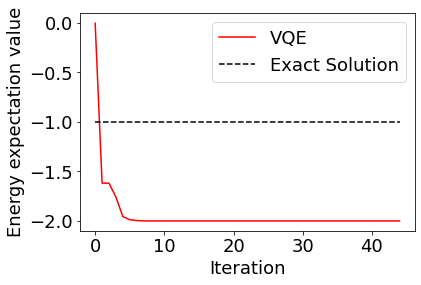

In [36]:
import matplotlib.pyplot as plt
%matplitlib inline

plt.rcParams["font.size"] = 18
plt.plot(cost_history_1_1, color="red", label="VQE_1_1")
plt.plot(cost_history_2_1, color="green", label="VQE_2_1")
plt.plot(cost_history_3_1, color="blue", label="VQE_3_1")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()